# TP Web Scraping
---

|                 |                                                                                      |
| --              | --                                                                                   |
| **Universidad** | Universidad Nacional del Oeste                                                       |
| **Carrera**     | Tec. Univ. en Tecnologías Web                                                        |
| **Materia**     | Taller de Lenguajes                                                                  |
| **Profesores**  | Mg. Ing. Pablo Pandolfo / Anta. Alex Andrada                                         |
| **Alumnos**     | Grupo 1 = {Bassi Matias, Bonello Facundo, Botto Hernán, Flores Daniel}               |
| **Fecha**       | Noviembre 2025                                                                       |
|                 |                                                                                      |

### Librerias empleadas en los ejemplos de codigo

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from datetime import date
import calendar
import re
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

## 1. Introducción al Web Scraping

### ¿Qué es el Web Scraping?

El web scraping es una técnica automatizada utilizada para extraer datos disponibles públicamente de sitios web. Consiste en realizar solicitudes a páginas web, obtener su contenido (generalmente HTML) y procesarlo para extraer la información deseada.

### Importancia y Aplicaciones

Muchas organizaciones y personas utilizan web scraping para:
- Analizar precios y estudiar la competencia en comercios electrónicos.
- Recolectar datos para investigaciones, como opiniones en redes sociales o noticias.
- Construir bases de datos sobre diversos temas cuando no existen APIs disponibles.
- Monitorizar cambios en páginas web.

### Aspectos éticos y legales

Es importante tener en cuenta que no todo dato publicado en un sitio web puede ser extraído sin restricciones. Las consideraciones incluyen:
- Revisar el archivo `robots.txt` de la web para respetar reglas de acceso.
- No saturar el servidor con demasiadas peticiones en poco tiempo.
- Respetar la propiedad intelectual y términos de uso.
- Evitar extraer datos personales sensibles.

Esta base teórica te permite comprender el propósito y alcance del proyecto de scraping y justificar los métodos usados en las siguientes etapas.

### ¿Qué es el archivo robots.txt?

El archivo robots.txt es un documento de texto colocado en la raíz de un sitio web que indica a los rastreadores de motores de búsqueda qué páginas o directorios pueden o no pueden ser accedidos y analizados. Funciona mediante instrucciones simples, llamadas directivas, que guían a los bots sobre qué contenido rastrear o ignorar.​

Este archivo ayuda a gestionar la carga del servidor y evitar que se indexen páginas no deseadas, pero solo influye en bots respetuosos y no en aquellos que actúan de forma maliciosa o que no respetan estas reglas. Por ejemplo, con una línea como **Disallow: /private/**, se bloquea el acceso a esa carpeta específica.

### Código básico para validar acceso a una página web



In [2]:
url = "https://www.tiobe.com/tiobe-index/"
response = requests.get(url)
print("Conexión exitosa" if response.status_code == 200 else "Error en la conexión")


Conexión exitosa


## 2. Herramientas y Librerías para Web Scraping en Python

### Librerías principales para realizar Web Scraping

Para realizar web scraping en Python, existen varias librerías populares y potentes que facilitan cada etapa del proceso:

- **Requests**: Permite realizar solicitudes HTTP para obtener el contenido HTML de páginas web. Es sencilla y eficiente para páginas estáticas.

- **BeautifulSoup**: Es una librería para analizar (parsear) documentos HTML o XML. Facilita navegar, buscar y extraer partes específicas del contenido HTML descargado.

- **Scrapy**: Framework completo para scraping avanzado. Permite crear proyectos potentes para extraer datos de múltiples páginas y manejar sesiones, seguimientos y reglas complejas.

- **Selenium**: Herramienta para automatizar navegadores web. Útil para páginas con contenido dinámico generado por JavaScript, donde Requests y BeautifulSoup no son suficientes.

### Uso conjunto

Lo común es usar primero Requests para descargar el contenido, luego BeautifulSoup para extraer datos. Para proyectos complejos o con contenido dinámico, Selenium o Scrapy son más adecuados.

---

### Ejemplo básico usando Requests y BeautifulSoup



In [3]:
# URL de la página principal del índice TIOBE
url = "https://www.tiobe.com/tiobe-index/"

try:
    response = requests.get(url, timeout=10)
    response.raise_for_status()  # Verifica que la respuesta sea exitosa
except requests.RequestException as e:
    print(f"Error al acceder a la página: {e}")
else:
    soup = BeautifulSoup(response.text, "html.parser")
    print("Título de la página:", soup.title.string)


Título de la página: TIOBE Index - TIOBE


Este simple ejemplo muestra cómo obtener el contenido HTML y extraer el título de la página.

## 3. Extracción de datos desde una página web

### Fundamentos de la extracción de datos

El contenido de una página web está estructurado en HTML, que utiliza etiquetas (tags) para organizar texto, imágenes y otros elementos.

Para extraer datos útiles, el scraper debe localizar los elementos HTML que contienen la información deseada. Esto se suele hacer buscando etiquetas específicas, clases CSS, IDs o atributos únicos.

### Técnicas comunes para localizar elementos

- **Selectores CSS:** Puedes usar selectores como `.clase`, `#id` o `tag` para seleccionar elementos.
- **BeautifulSoup:** Tiene funciones como `find()` para buscar un solo elemento y `find_all()` para múltiples.
- **XPath:** Método alternativo para seleccionar nodos en un documento HTML o XML (más avanzado).

---

### Ejemplo: Extracción de los 5 primeros lenguajes más usados en el índice TIOBE

En la página *https://www.tiobe.com/tiobe-index/*, los lenguajes de programación más usados se muestran en una tabla llamada "Top 20". Cada fila de la tabla representa un lenguaje y contiene:

**Posición**

**Nombre del lenguaje**

**Porcentaje de uso**

A continuación, un código que extrae y muestra solo los primeros 5 lenguajes:



In [4]:
url = "https://www.tiobe.com/tiobe-index/"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    tabla = soup.find("table", {"class": "table-top20"})
    
    if tabla:
        filas = tabla.find_all("tr")[1:6]  # Solo primeros 5 lenguajes, saltando header
        for fila in filas:
            celdas = fila.find_all("td")
            if len(celdas) >= 7:
                posicion = celdas[0].get_text(strip=True)
                lenguaje = celdas[4].get_text(strip=True)
                cuota = celdas[5].get_text(strip=True)
                print(f"Posición: {posicion}, Lenguaje: {lenguaje}, Porcentaje: {cuota}")
    else:
        print("No se encontró la tabla Top 20 en la página.")
else:
    print(f"Error al acceder a la página: {response.status_code}")


Posición: 1, Lenguaje: Python, Porcentaje: 23.37%
Posición: 2, Lenguaje: C, Porcentaje: 9.68%
Posición: 3, Lenguaje: C++, Porcentaje: 8.95%
Posición: 4, Lenguaje: Java, Porcentaje: 8.54%
Posición: 5, Lenguaje: C#, Porcentaje: 7.65%


## 4. Procesamiento y limpieza de datos

### Importancia del procesamiento y limpieza

Después de extraer los datos de una página web, rara vez están en un formato listo para análisis o almacenamiento. Pueden contener:

- Etiquetas HTML sobrantes o caracteres especiales
- Datos incompletos o con valores nulos
- Información duplicada o inconsistente
- Formatos que deben normalizarse para un uso correcto

Limpiar y procesar estos datos es fundamental para obtener información útil y fiable.

### Técnicas comunes

- **Eliminación de etiquetas y formato:** usando BeautifulSoup o expresiones regulares para extraer solo texto relevante.
- **Manejo de valores faltantes:** eliminar, rellenar o modificar registros con datos incompletos.
- **Eliminación de duplicados:** asegurar que la información no se repite.
- **Normalización:** estandarizar formatos de fechas, nombres, o cualquier campo específico.
- **Conversión de tipos:** transformar strings a números, fechas u otros tipos para facilitar análisis.

### Herramientas útiles

- **Pandas:** biblioteca muy poderosa para manipulación y limpieza de datos tabulares.
- **Regex:** expresiones regulares para búsqueda y reemplazo de patrones en textos.

---

### Ejemplo: Limpieza básica con pandas



In [5]:
# Datos simulados que podrían extraerse del web scraping a TIOBE, con algunos valores repetidos y faltantes
datos_tiobe = [
    {"Año": "2025", "Mes": "10", "Lenguaje": "Python", "Porcentaje de Uso": "24.45%"},
    {"Año": "2025", "Mes": "10", "Lenguaje": "Python", "Porcentaje de Uso": "24.45%"},  # Duplicado
    {"Año": "2025", "Mes": "10", "Lenguaje": None, "Porcentaje de Uso": "11.00%"},     # Lenguaje missing
    {"Año": "2025", "Mes": "10", "Lenguaje": "C", "Porcentaje de Uso": None}            # Porcentaje missing
]

df = pd.DataFrame(datos_tiobe)

print("Datos originales extraídos de la web de TIOBE:")
print(df)

# Eliminamos filas con datos nulos
df_clean = df.dropna()

# Eliminamos filas duplicadas
df_clean = df_clean.drop_duplicates()

print("\nDatos después de la limpieza:")
print(df_clean)


Datos originales extraídos de la web de TIOBE:
    Año Mes Lenguaje Porcentaje de Uso
0  2025  10   Python            24.45%
1  2025  10   Python            24.45%
2  2025  10     None            11.00%
3  2025  10        C              None

Datos después de la limpieza:
    Año Mes Lenguaje Porcentaje de Uso
0  2025  10   Python            24.45%


Este ejemplo muestra cómo pandas facilita el manejo y limpieza de datos para que estén listos para análisis o almacenamiento.

## 5. Almacenamiento de datos obtenidos

### Por qué almacenar los datos raspados

Una vez extraídos y procesados los datos de una web, es crucial guardarlos para análisis posteriores, compartir o reutilizar sin necesidad de scrapear nuevamente la página.

### Formatos comunes para almacenar datos

- **CSV (Comma Separated Values):** Archivo de texto plano para datos tabulares, fácil de abrir con editores, hojas de cálculo y analizar con programas.
- **JSON:** Útil para estructuras de datos jerárquicas o anidadas, muy usado para APIs y aplicaciones web.
- **Bases de datos SQL o NoSQL:** Para grandes volúmenes, consultas complejas o integraciones con sistemas más avanzados.

### Consideraciones

- Elegir el formato adecuado según el tipo y volumen de datos.
- Asegurar la codificación correcta (UTF-8 recomendado).
- Considerar almacenamiento incremental o actualizado si se ejecuta scraping periódico.

---

### Ejemplo: Guardar datos en CSV y JSON con Pandas



In [6]:
# Datos simulados extraídos de TIOBE después de ser limpiados
datos_tiobe = [
    {"Año": "2025", "Mes": "10", "Lenguaje": "Python", "Porcentaje de Uso": "24.45%"},
    {"Año": "2025", "Mes": "10", "Lenguaje": "C", "Porcentaje de Uso": "11.00%"},
    {"Año": "2025", "Mes": "10", "Lenguaje": "C++", "Porcentaje de Uso": "9.50%"}
]

df = pd.DataFrame(datos_tiobe)

# Guardar en CSV sin índice y con codificación utf-8
archivo_csv = "tiobe_ultimo_ano_top20.csv"
df.to_csv(archivo_csv, index=False, encoding="utf-8")
print(f"Datos guardados en {archivo_csv}")

# Leer CSV para validar
df_leido_csv = pd.read_csv(archivo_csv, encoding="utf-8")
print("Lectura CSV:")
print(df_leido_csv.head())

# Guardar en JSON con orientación records y sin forzar ASCII
archivo_json = "tiobe_ultimo_ano_top20.json"
df.to_json(archivo_json, orient="records", force_ascii=False, indent=4)
print(f"Datos guardados en {archivo_json}")

# Leer JSON para validar
df_leido_json = pd.read_json(archivo_json, orient="records")
print("Lectura JSON:")
print(df_leido_json.head())


Datos guardados en tiobe_ultimo_ano_top20.csv
Lectura CSV:
    Año  Mes Lenguaje Porcentaje de Uso
0  2025   10   Python            24.45%
1  2025   10        C            11.00%
2  2025   10      C++             9.50%
Datos guardados en tiobe_ultimo_ano_top20.json
Lectura JSON:
    Año  Mes Lenguaje Porcentaje de Uso
0  2025   10   Python            24.45%
1  2025   10        C            11.00%
2  2025   10      C++             9.50%


Este código simula que ya tienes el **DataFrame limpio (df)** con datos como los que extraerías de TIOBE, y luego muestra cómo:

-Guardar el DataFrame en archivo CSV.

-Leer el CSV para validación.

-Guardar el DataFrame en archivo JSON.

-Leer el JSON para validación.



Se usa el parámetro **orient='records'** para que el JSON resultante sea una lista de objetos, donde cada objeto representa una fila del DataFrame. Esto facilita su lectura y uso en APIs o aplicaciones que consumen datos JSON.

El parámetro **force_ascii=False** permite que se guarden correctamente los caracteres especiales (como acentos, la letra ñ, y otros caracteres no ASCII) en el archivo JSON.

El parámetro **indent=4** agrega sangrías y saltos de línea al archivo JSON para que sea legible por humanos, facilitando su inspección y edición manual si es necesario.

Finalmente, el archivo JSON guardado se puede leer con **pd.read_json()** especificando la misma orientación (**orient='records'**) para reconstruir el DataFrame original y verificar que los datos se guardaron y recuperaron correctamente.

## 6. Automatización y consideraciones éticas en Web Scraping

### Automatización del scraping

Automatizar el proceso de scraping implica ejecutar secuencias de comandos que recogen datos de forma periódica o continua, sin intervención manual. Esto permite:

- Actualizar datos frecuentemente.
- Procesar grandes volúmenes de información.
- Aumentar la eficiencia y reducir errores humanos.

Un ejemplo es incluir pausas (`time.sleep()`) para respetar la capacidad del servidor y evitar bloqueos o caídas por exceso de peticiones.

---

### Buenas prácticas y consideraciones éticas

Aunque el web scraping es una técnica poderosa, hay responsabilidades importantes:

- Respetar el archivo `robots.txt` del sitio: indica qué contenido está permitido para scraping.
- No sobrecargar el servidor con peticiones masivas o muy frecuentes.
- Cumplir con la legislación vigente respecto a la privacidad y derechos de datos.
- Usar los datos recolectados de manera ética, transparente y siempre citando las fuentes cuando sea necesario.
- Evitar scraping en sitios con contenido protegido por derechos de autor o con acceso restringido.

---

### Ejemplo básico de automatización con pausas



In [8]:
# URLs de páginas mensuales del índice TIOBE (puedes agregar más si quieres)
urls = [
    "https://www.tiobe.com/tiobe-index/2025-10/",
    "https://www.tiobe.com/tiobe-index/2025-09/",
    "https://www.tiobe.com/tiobe-index/2025-08/"
    # Agrega más URLs mensuales según necesidad
]

for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        tabla = soup.find("table", {"class": "table-top20"})
        if tabla:
            filas = tabla.find_all("tr")[1:]  # Saltar encabezado
            print(f"Datos de {url}:")
            for fila in filas:
                celdas = fila.find_all("td")
                if len(celdas) >= 7:
                    posicion = celdas[0].get_text(strip=True)
                    lenguaje = celdas[4].get_text(strip=True)
                    cuota = celdas[5].get_text(strip=True)
                    print(f"  {posicion}. {lenguaje} - {cuota}")
        else:
            print(f"No se encontró la tabla en {url}")
    else:
        print(f"Error al acceder a {url}, código {response.status_code}")
    time.sleep(2)  # Pausa de 2 segundos entre peticiones para no saturar servidor


Datos de https://www.tiobe.com/tiobe-index/2025-10/:
  1. Python - 23.37%
  2. C - 9.68%
  3. C++ - 8.95%
  4. Java - 8.54%
  5. C# - 7.65%
  6. JavaScript - 3.42%
  7. Visual Basic - 3.31%
  8. Delphi/Object Pascal - 2.06%
  9. Perl - 1.84%
  10. SQL - 1.80%
  11. Go - 1.72%
  12. R - 1.67%
  13. Fortran - 1.55%
  14. Rust - 1.39%
  15. MATLAB - 1.38%
  16. PHP - 1.31%
  17. Ada - 1.23%
  18. Assembly language - 1.16%
  19. Scratch - 1.02%
  20. Kotlin - 0.98%
Datos de https://www.tiobe.com/tiobe-index/2025-09/:
  1. Python - 23.37%
  2. C - 9.68%
  3. C++ - 8.95%
  4. Java - 8.54%
  5. C# - 7.65%
  6. JavaScript - 3.42%
  7. Visual Basic - 3.31%
  8. Delphi/Object Pascal - 2.06%
  9. Perl - 1.84%
  10. SQL - 1.80%
  11. Go - 1.72%
  12. R - 1.67%
  13. Fortran - 1.55%
  14. Rust - 1.39%
  15. MATLAB - 1.38%
  16. PHP - 1.31%
  17. Ada - 1.23%
  18. Assembly language - 1.16%
  19. Scratch - 1.02%
  20. Kotlin - 0.98%
Datos de https://www.tiobe.com/tiobe-index/2025-08/:
  1. Python - 2

Este código automatiza la extracción de datos de varias páginas mensuales de TIOBE, imprime la tabla top 20 para cada mes, y espera 2 segundos entre cada petición para respetar al servidor

## 7. Qué puede salir mal en tu proyecto de Web Scraping?

Es habitual encontrarse con dificultades al raspar sitios web, especialmente los de acceso restringido. A continuación se exponen algunos de los problemas y cómo abordarlos.

**Gestión de CAPTCHA y bloqueo de IP**  
Los sitios web implementan CAPTCHAs y bloqueos de IP como medidas de seguridad para limitar el web scraping. Los CAPTCHA diferencian entre usuarios humanos y bots, mientras que el bloqueo de IP se produce cuando un sitio detecta demasiadas peticiones de la misma dirección IP en poco tiempo, marcándola como potencialmente dañina.

Si te enfrentas a este reto, aplica las siguientes soluciones para realizar con éxito el raspado web:  
- Apoderados rotatorios: Utilizar proxies rotatorios para distribuir tus peticiones entre varias direcciones IP hace que a los sitios web les resulte más difícil detectar tu actividad de scraping basándose en patrones de IP.  
- Navegadores sin cabeza: Ejecutar un navegador en modo headless (sin interfaz gráfica) te ayuda a raspar sitios que dependen de las interacciones del usuario, reduciendo la posibilidad de detección.  
- Servicios de resolución de CAPTCHA: Para eludir los CAPTCHA, utiliza servicios de resolución de CAPTCHA de terceros, como AntiCaptcha. Estos servicios utilizan la automatización para interpretar los CAPTCHAs y devolver la solución, permitiendo que tu script continúe con el scraping.

**Raspado de contenido dinámico**  
Muchos sitios web modernos utilizan JavaScript para cargar contenido dinámicamente, lo que significa que los datos que deseas pueden no aparecer en el código fuente HTML hasta que la página se haya renderizado por completo. Si quieres extraer datos de esos sitios web, considera las siguientes soluciones:  
- Selenio: Selenium es una herramienta esencial para el scraping de contenido renderizado en JavaScript, ya que puede interactuar con la página web igual que un usuario real, lo que la hace perfecta para el scraping de sitios web que requieren JavaScript para mostrar el contenido.  
- APIs: A veces, los sitios web exponen sus datos a través de API ocultas llamadas por el JavaScript que se ejecuta en el sitio. Puedes extraer datos directamente de estas API, sin necesidad de renderizar la página.


## 8. Reflexión final sobre el uso del Web Scraping

El web scraping es una técnica poderosa que permite extraer gran cantidad de datos públicos valiosos para análisis, investigación y desarrollo de negocios. Sin embargo, su uso responsable es fundamental para mantener un ecosistema digital sano y sostenible.

- **Uso responsable:** Implica respetar las reglas de los sitios web, como las indicadas en el archivo `robots.txt`, limitar la frecuencia de peticiones para no saturar servidores y evitar la extracción de datos personales o sensibles sin consentimiento.

- **Potencial de mal uso:** El scraping indiscriminado puede derivar en sobrecarga de servidores, vulnerar la privacidad de usuarios y generar conflictos legales por violar términos de uso o regulaciones de protección de datos como GDPR o CCPA.

- **Ética y legalidad:** Adoptar buenas prácticas éticas y legales no solo protege a los dueños de los datos y usuarios finales, sino también a quienes realizan el scraping, evitando sanciones y daños reputacionales.

- **Transparencia y consentimiento:** Siempre que sea posible, informar y obtener permiso para la recopilación de datos crea un entorno de confianza y cooperación.

En conclusión, el web scraping es una herramienta valiosa cuando se usa con conciencia, ética y respeto, contribuyendo a la generación de conocimiento y soluciones innovadoras sin comprometer derechos ni recursos ajenos.


## Ejemplo de web Scraping
### Extracción completa del Índice TIOBE 

El siguiente trabajo realizado scrapea la página del índice TIOBE para obtener los lenguajes de programación más usados a lo largo del último año segun la informacion brindada por la pagina (ACTUALMENTE LA INFO QUE BRINDA LA PAGINA ES DE OCTUBRE 2024 A OCTUBRE 2025).

El programa realiza las siguientes acciones principales:


- Descarga el contenido HTML de cada página.

- Almacena los datos en un DataFrame de pandas.

- Extrae la tabla con los lenguajes, sus porcentajes de uso y cambios.


- Finalmente, genera un grafico y guarda los datos en formatos CSV/JSON para análisis posterior.

Este ejemplo integra las siguientes técnicas:

- Uso de Requests para realizar la descarga web.

- Empleo de BeautifulSoup para el parsing y extracción de datos.

- Manejo de errores.

- Uso de pandas para organización, limpieza y almacenamiento de datos.

- La librerira matplotlib para la generacion de graficos.

### Scraping

In [9]:
# ==============================================================================
# 1. FUNCION DE SCRAPING
# ==============================================================================

def obtener_ranking_actual_tiobe():
    """
    Obtiene el ranking actual de TIOBE desde la página principal, extrayendo el mes de análisis del encabezado (<th>) de la tabla.
    Retorna un DataFrame con el Lenguaje, el porcentaje de uso (Rating) y el cambio en el uso respecto al periodo anterior.
    """
    url_base = "https://www.tiobe.com/tiobe-index/"

    try:
        response = requests.get(url_base, timeout=10)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"⚠️ Error al acceder a {url_base}: {e}")
        return pd.DataFrame()

    soup = BeautifulSoup(response.text, "html.parser")

    # 1. Busca la tabla con la clase "table-top20"
    tabla = soup.find("table", {"class": "table-top20"})

    if not tabla:
        print(f"⚠️ No se encontró la tabla en {url_base}.")
        return pd.DataFrame()

    # 2. Intenta encontrar el mes de la publicación en el TH de la tabla
    try:
        # La cabecera es el primer <tr> de la tabla
        cabecera_fila = tabla.find("tr")

        # El <th> (índice 0, contando desde 0) contiene el mes y año del rating actual (e.g., "Oct 2025")
        mes_anio_texto = cabecera_fila.find_all("th")[0].text.strip()

        # Extracción del mes (3 letras) y año (4 dígitos) usando regex (ej: "Oct 2025")
        match = re.search(r'([A-Za-z]{3})\s(\d{4})', mes_anio_texto)

        if match:
            mes_abrev = match.group(1) # Ej: 'Oct'
            anio_publicacion = match.group(2) # Ej: '2025'

            # Mapeo de abreviatura de mes (inglés) a número
            meses_abrev = {
                'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
            }

            mes_num = meses_abrev.get(mes_abrev, 0)

            if mes_num > 0:
                # Formato final "AAAA-MM"
                fecha_extraida= f"{anio_publicacion}-{mes_num:02d}"
                print(f"Fecha extraída del TH: {fecha_extraida}")
            else:
                 print(f"⚠️ No se pudo reconocer la abreviatura de mes: {mes_abrev}.")
        else:
             print(f"⚠️ El formato de fecha '{mes_anio_texto}' no se pudo parsear.")

    except IndexError:
        print("⚠️ No se encontró el tercer <th> en la cabecera de la tabla. Usando la fecha de hoy.")
    except Exception as e:
        print(f"⚠️ Error al procesar el TH de la cabecera: {e}. Usando la fecha de hoy.")
        pass # Si falla, usa el valor por defecto

    # Continuación del scraping de datos
    filas = tabla.find_all("tr")[1:] # Saltar la cabecera

    datos_ranking = []

    # Índices de columna que nos interesan:
    # Índice 4: Lenguaje
    # Índice 5: Porcentaje de uso
    # Índice 6: Cambio en el uso

    for fila in filas:
        columnas = fila.find_all("td")
        if len(columnas) >= 7:
            # 💡 USAMOS EL VALOR DE mes_actual EXTRAÍDO DEL TH DE LA CABECERA
            lenguaje = columnas[4].text.strip()
            porcentaje = columnas[5].text.strip()
            change = columnas[6].text.strip()

            # Agrega los datos
            datos_ranking.append({
                "Mes": fecha_extraida,
                "Lenguaje": lenguaje,
                "Porcentaje de Uso": porcentaje,
                "Cambio": change
            })

    # Crea el DataFrame y lo retorna
    df_ranking = pd.DataFrame(datos_ranking)
    return df_ranking

### Tabla

In [10]:
# ==============================================================================
# 2. RECOPILAR Y GUARDAR EN EL DATAFRAME
# ==============================================================================

def recopilar_y_guardar_datos_simplificado():
    print("🔍 Recopilando datos del ranking TIOBE actual...")
    df_final = obtener_ranking_actual_tiobe()

    if not df_final.empty:
        print("\n\n🎉 ¡Recopilación completada!")
        print(f"Total de filas recopiladas: {len(df_final)}")
        print("\n--- Ranking TIOBE Actual ---")
        print(df_final.to_markdown(index=False))
        return df_final
    else:
        print("\n\n❌ No se pudo recopilar ningún dato.")
        return df_final

# Ejecutar la función principal
df_ranking_actual = recopilar_y_guardar_datos_simplificado()

🔍 Recopilando datos del ranking TIOBE actual...
Fecha extraída del TH: 2025-11


🎉 ¡Recopilación completada!
Total de filas recopiladas: 20

--- Ranking TIOBE Actual ---
| Mes     | Lenguaje             | Porcentaje de Uso   | Cambio   |
|:--------|:---------------------|:--------------------|:---------|
| 2025-11 | Python               | 23.37%              | +0.52%   |
| 2025-11 | C                    | 9.68%               | +0.67%   |
| 2025-11 | C++                  | 8.95%               | -1.69%   |
| 2025-11 | Java                 | 8.54%               | -1.06%   |
| 2025-11 | C#                   | 7.65%               | +2.67%   |
| 2025-11 | JavaScript           | 3.42%               | -0.29%   |
| 2025-11 | Visual Basic         | 3.31%               | +1.36%   |
| 2025-11 | Delphi/Object Pascal | 2.06%               | +0.58%   |
| 2025-11 | Perl                 | 1.84%               | +1.16%   |
| 2025-11 | SQL                  | 1.80%               | -0.14%   |
| 2025-11 | Go

### Grafico


--- Visualización del Cambio Anual ---


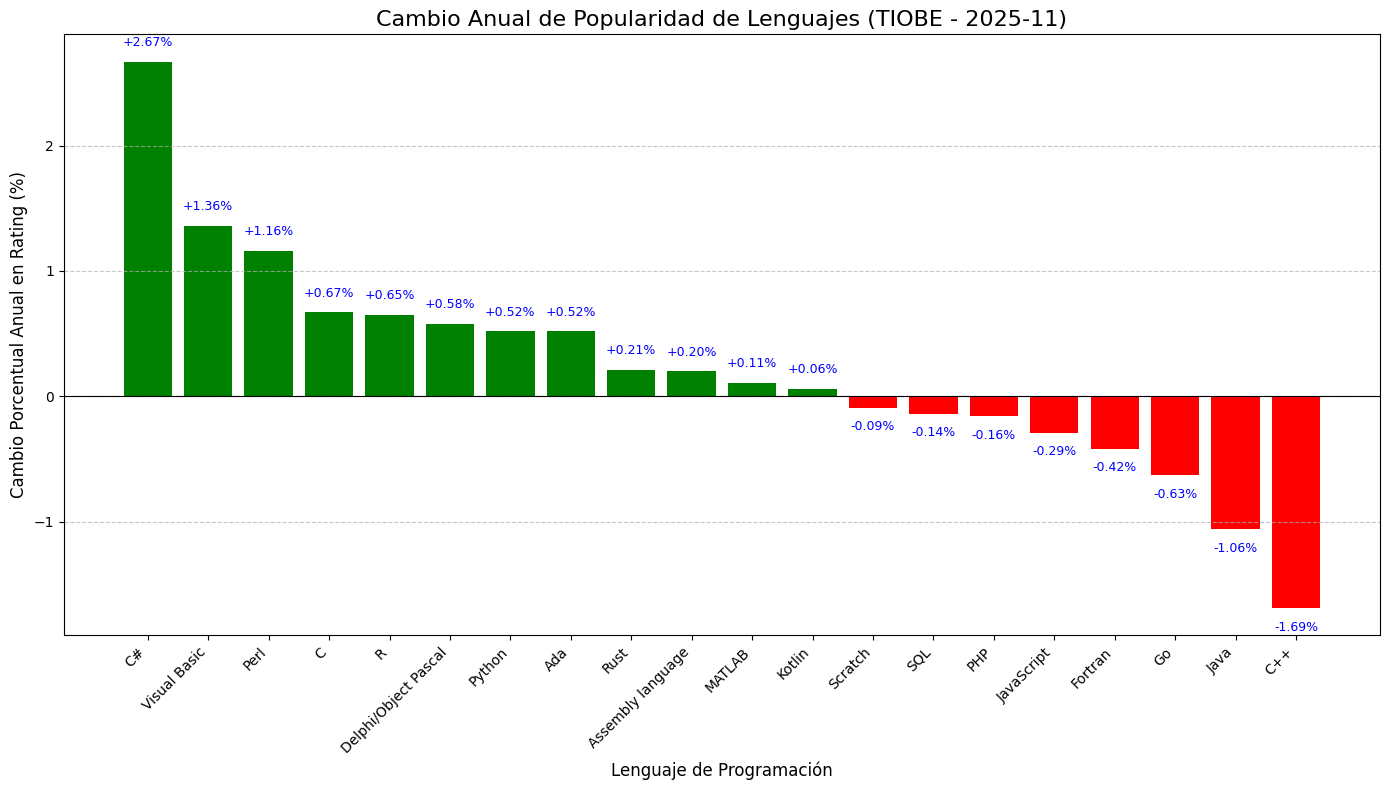

In [11]:
# ==============================================================================
# 3. FUNCIÓN DE VISUALIZACIÓN
# ==============================================================================

def generar_grafico_cambio_anual(df_ranking):
    if df_ranking.empty:
        print("El DataFrame está vacío. No se puede generar el gráfico.")
        return

    # Limpieza y conversión de la columna "Cambio"
    def limpiar_columna_cambio(df):
        if 'Cambio' not in df.columns:
            return df
        # Quita el signo de porcentaje y convierte a flotante.
        df['Cambio_Num'] = df['Cambio'].str.replace('%', '', regex=False).astype(float)
        return df

    df_grafico = limpiar_columna_cambio(df_ranking.copy())

    # Ordenar por el valor del cambio (descendente)
    df_grafico = df_grafico.sort_values(by='Cambio_Num', ascending=False).reset_index(drop=True)

    # Crear la lista de colores (verde para positivo, rojo para negativo)
    colores = np.where(df_grafico['Cambio_Num'] >= 0, 'green', 'red')

    # Creación del Gráfico de Barras con plt.bar
    plt.figure(figsize=(14, 8))

    barras = plt.bar(
        x=df_grafico['Lenguaje'],
        height=df_grafico['Cambio_Num'],
        color=colores
    )

    # Añadir etiquetas y título
    plt.title(f'Cambio Anual de Popularidad de Lenguajes (TIOBE - {df_grafico["Mes"].iloc[0]})', fontsize=16)
    plt.xlabel('Lenguaje de Programación', fontsize=12)
    plt.ylabel('Cambio Porcentual Anual en Rating (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.axhline(0, color='black', linewidth=0.8) # Línea de referencia en cero

    # Añadir el valor exacto encima o debajo de cada barra
    for i, row in df_grafico.iterrows():
        y_pos = row['Cambio_Num']

        # Ajustar la posición y el alineamiento vertical del texto
        if y_pos >= 0:
            va = 'bottom'
            margin = 0.1
        else:
            va = 'top'
            margin = -0.1

        plt.text(
            x=i,
            y=y_pos + margin,
            s=f"{row['Cambio']}",
            color='blue',
            ha="center",
            va=va,
            fontsize=9
        )

    plt.tight_layout()
    plt.show() # Muestra el gráfico
    # plt.savefig('cambio_anual_lenguajes_tiobe.png') # Descomenta para guardar el archivo

# ==============================================================================
# 4. GENERAR EL GRÁFICO
# ==============================================================================

if not df_ranking_actual.empty:
    print("\n--- Visualización del Cambio Anual ---")
    generar_grafico_cambio_anual(df_ranking_actual)
else:
    print("\nNo se puede generar el gráfico porque el DataFrame de ranking está vacío.")

### Archivos de guardado

#### CSV

In [12]:
# ==============================================================================
# 5. GUARDAR CSV
# ==============================================================================
df_ranking_actual.to_csv("tiobe_ultimo_ano_top20.csv", index=False, encoding="utf-8")

#### JSON

In [13]:
# ==============================================================================
# 6. GUARDAR JSON
# ==============================================================================
df_ranking_actual.to_json("tiobe_ultimo_ano_top20.json", orient="records", force_ascii=False, indent=4)